In [19]:
import pandas as pd
# 超参数
COLS_Y = '下期百位是1'
COLS_Y_CLASSNAME = ["不是1", "是1"]
COLS_ALL = ['号码1','号码1奇偶','号码2','号码2奇偶','号码3','号码3奇偶','跨度','和值','下期百位是1']

# 读取excel文件并获取指定列
df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)
# df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx')
df = df[:350]
print(df)

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\admin\AppData\Local\Temp\ipykernel_23252\246425840.py:8: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)


     号码1  号码1奇偶  号码2  号码2奇偶  号码3  号码3奇偶  跨度  和值  下期百位是1
0      8      0    1      1    6      0   7  15       0
1      9      1    5      1    5      1   4  19       0
2      8      0    1      1    3      1   7  12       0
3      2      0    5      1    6      0   4  13       0
4      5      1    3      1    6      0   3  14       0
..   ...    ...  ...    ...  ...    ...  ..  ..     ...
345    2      0    4      0    7      1   5  13       0
346    9      1    2      0    2      0   7  13       0
347    9      1    5      1    9      1   4  23       0
348    9      1    7      1    0      0   9  16       0
349    9      1    4      0    2      0   7  15       0

[350 rows x 9 columns]


In [20]:
from sklearn.model_selection import train_test_split

## 取需要训练的值
cols_x = df.drop(columns=COLS_Y)
cols_y = df[COLS_Y]
cols_x_names = cols_x.columns.tolist()

Xtrain, Xtest, Ytrain, ytest = train_test_split(cols_x,cols_y,test_size=0.2, random_state=180) 

print(Xtrain.shape)
print(Xtest.shape)



(280, 8)
(70, 8)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# 训练模型
clf = RandomForestClassifier(n_estimators=100, random_state = 42)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
clf = clf.fit(Xtrain, Ytrain) 

# 预测测试集
y_pred = clf.predict(Xtest)

# 评估模型
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#print('精准度： '+str(clf.score(Xtest, ytest))) #返回预测的准确度
#print([*zip(feature_name,clf.feature_importances_)]) #返回决策树各自变量的重要程度

Accuracy: 0.8285714285714286
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.00      0.00      0.00         6

    accuracy                           0.83        70
   macro avg       0.45      0.45      0.45        70
weighted avg       0.83      0.83      0.83        70



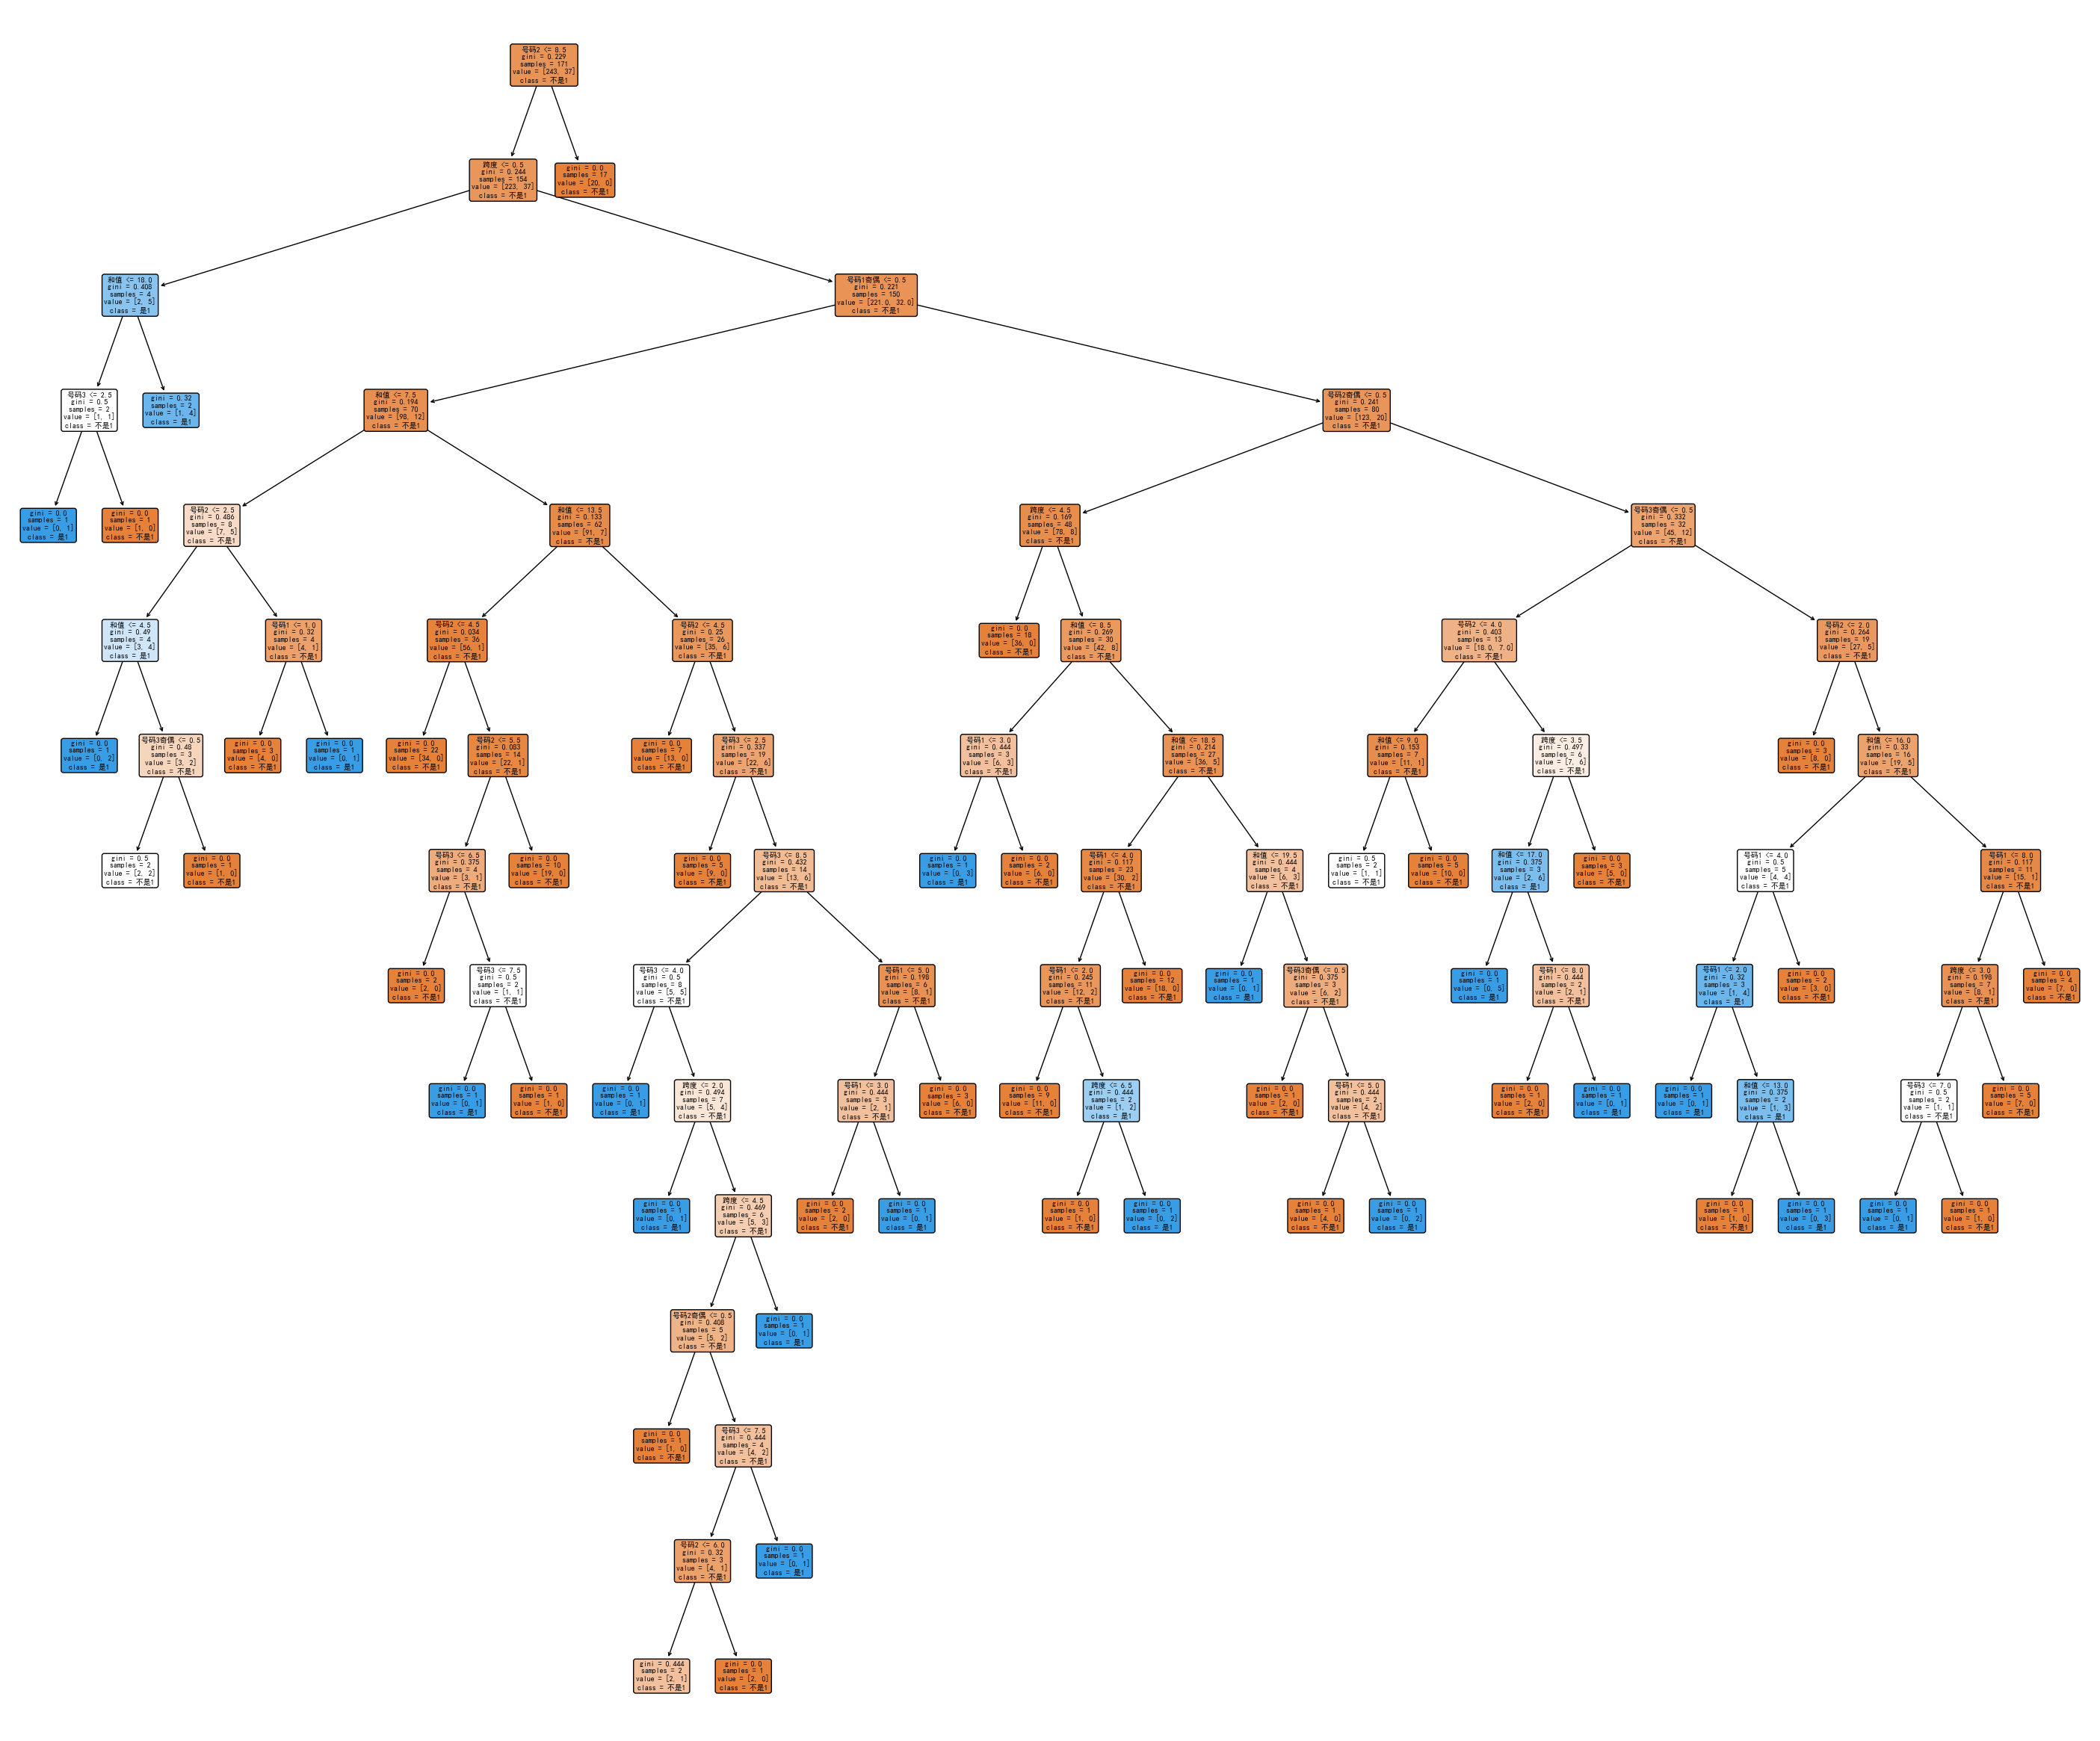

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 选择森林中的一棵树进行绘制
tree_num = 3  # 选择第一棵树
plt.figure(figsize=(36,30))
plot_tree(clf.estimators_[tree_num], feature_names=cols_x_names,
          class_names=COLS_Y_CLASSNAME, filled=True, rounded=True)
plt.show()